In [6]:
#set up
import numpy as np
import scipy.io as spio
from scipy.integrate import solve_ivp
##%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rcParams['font.size'] = 18
rc('font', family='sans-serif')
rcParams['font.family'] = 'Serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
# changed to False because I am not using LaTex
rcParams['text.usetex'] = False

In [7]:
#maximal conductances in mS/cm^2
gL = 0.1; #leak

#reversal potential (in mV)
VL = 0;

#conductance coupling coefficient between soma and dendrite compartment 
#(in mS/cm^2)
gc = 1.85; 

#fraction of cable length assigned to soma (1-p for dendrite)
p = 0.5;

#capacitance uF/cm^2
Cm = 3;

gc_t = gc/p;
rho_c = gc_t/gL;

tau = Cm/gL; # in ms
tau1 = tau/(1 + 2*rho_c)

Is = 1; # in uA/cm^2
Is_t = Is/p; #Is tilde

t1 = 20 #time current starts being injected
t2 = 220 #time currect stops being injected

# Stimulus current, this should be 10 instead of 10e-5, likely due to her implementation
def Istim(t):
    if t>t1 and t<t2:
        Istim = Is_t
    else:
        Istim=0
    return Istim



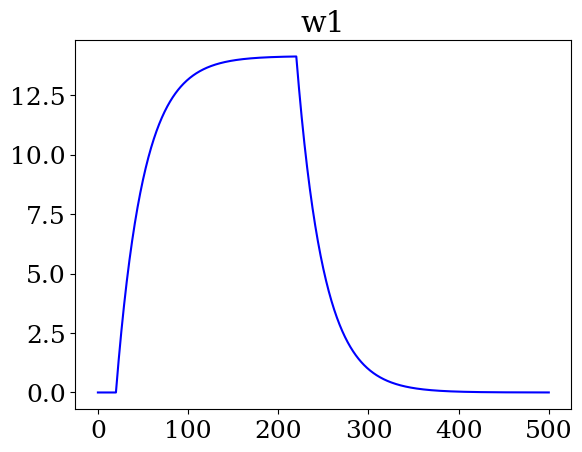

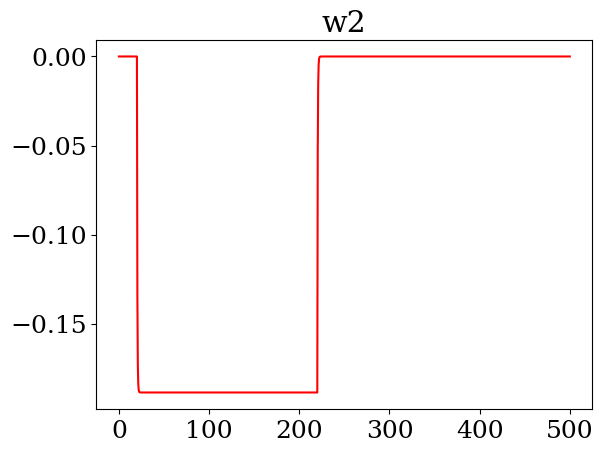

In [8]:
import math
#analytical solutions for decoupled equations
def func_w1 (t, t1, t2): 
    if t<t1:
        return 0
    elif t>=t1 and t<=t2:
        return (Is_t/(math.sqrt(2)*gL))*(1-math.e**((t1-t)/tau))
    else:
        return (Is_t/(math.sqrt(2)*gL))*((math.e**((t2-t)/tau))-math.e**((t1-t)/tau))

def func_w2 (t, t1, t2): 

    if t<t1:
        return 0
    elif t>=t1 and t<=t2:
        return (-Is_t)/(math.sqrt(2)*gL*(1 + 2*rho_c))*(1-math.e**((t1-t)/tau1))
    else:
        return (-Is_t)/(math.sqrt(2)*gL*(1 + 2*rho_c))*((math.e**((t2-t)/tau1))-math.e**((t1-t)/tau1))

#vectorizes the functions 
vfunc_w1 = np.vectorize(func_w1, otypes=[float]) # must add the extra float input so that the program 
                                                #stores more precise data
vfunc_w2 = np.vectorize(func_w2, otypes=[float])

# vectorizes the time so that it is an array that is [0, 0.5, 1,...,499.5, 500]
t = np.linspace(0, 500, 1001)

#computes the output of the function for every element in the the array of t
y_w1 = vfunc_w1(t, t1, t2)
y_w2 = vfunc_w2(t, t1, t2)

#display results
#fig1 = plt.figure(figsize=(12,5))
plt.plot(t, y_w1, c='b', label='w1_analytical')
plt.title("w1")
plt.show()

plt.plot(t, y_w2, c='r', label='w2_analytical')
plt.title("w2")
plt.show()

In [9]:
#debugging that was done to figure out we needed an extra "otypes=[float]" in the function vectorization
print(func_w1(200, t1, t2))
print(func_w1(190, t1, t2))
print(func_w1(130, t1, t2))
print(func_w1(150, t1, t2))
print(func_w2(200, t1, t2))
print(t[300])
print(y_w1[300])

14.107080774270914
14.093212640265001
13.780640954374016
13.956538072044072
-0.18856180831641264
150.0
13.956538072044072
